In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [22]:
snp_tickers = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'NVDA', 'BRK-B', 'META', 'UNH', 'JNJ', 'JPM', 'V', 'PG', 'XOM', 
'HD', 'CVX', 'MA', 'BAC', 'ABBV', 'PFE', 'AVGO', 'COST', 'DIS', 'KO']
snp = yf.download(snp_tickers, end='2020-03-01')['Adj Close']
snp = snp.dropna()


[*********************100%***********************]  25 of 25 completed


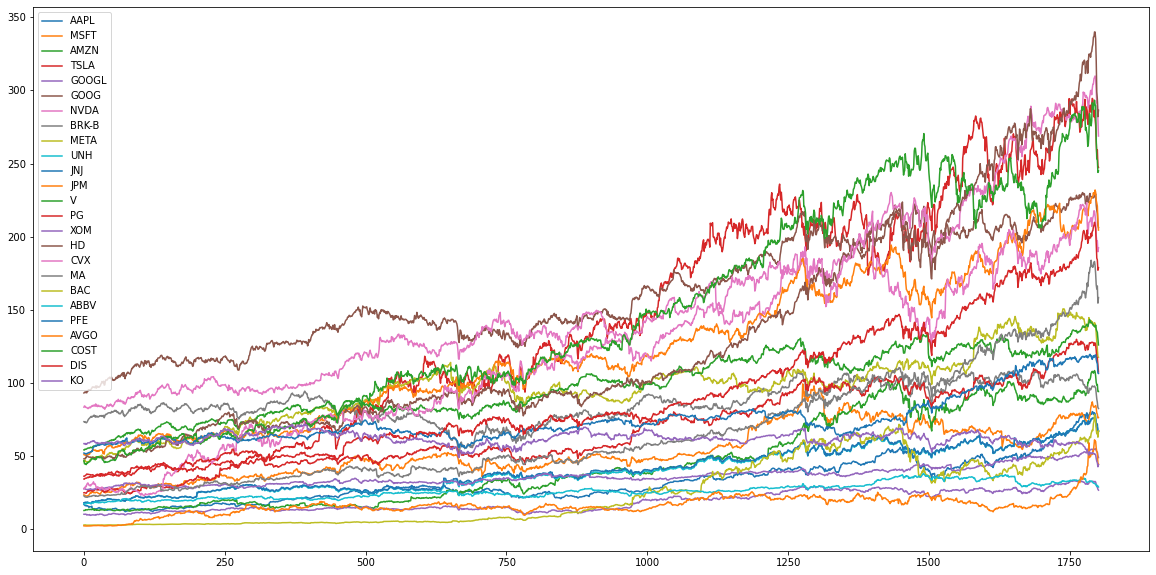

In [23]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(snp.to_numpy(), label=snp_tickers)
plt.legend(loc="upper left")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(snp, test_size=0.15, shuffle=False)

# normalize train and test data based off of std deviation and mean of the train set


In [43]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit()
print(tscv)

i = 0
for train_index, test_index in tscv.split(snp):
    X_train, X_test = snp.iloc[train_index.tolist()], snp.iloc[test_index.tolist()]
    normalized_X_train = (X_train - X_train.mean()) / X_train.std()
    normalized_X_test = (X_test - X_train.mean()) / X_train.std()
    i = i+1
    normalized_X_train.to_csv("cross_validated_data/cv_norm_precovid_train" + str(i) + ".csv", index=False)
    normalized_X_test.to_csv("cross_validated_data/cv_norm_precovid_test" + str(i) + ".csv", index=False)

    X_test.to_csv("sameer_data/cv_raw_precovid_test" + str(i) + ".csv", index=True)
    normalized_X_test.to_csv("sameer_data/cv_norm_precovid_test" + str(i) + ".csv", index=True)




TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


OSError: Cannot save file into a non-existent directory: 'sammer_data'

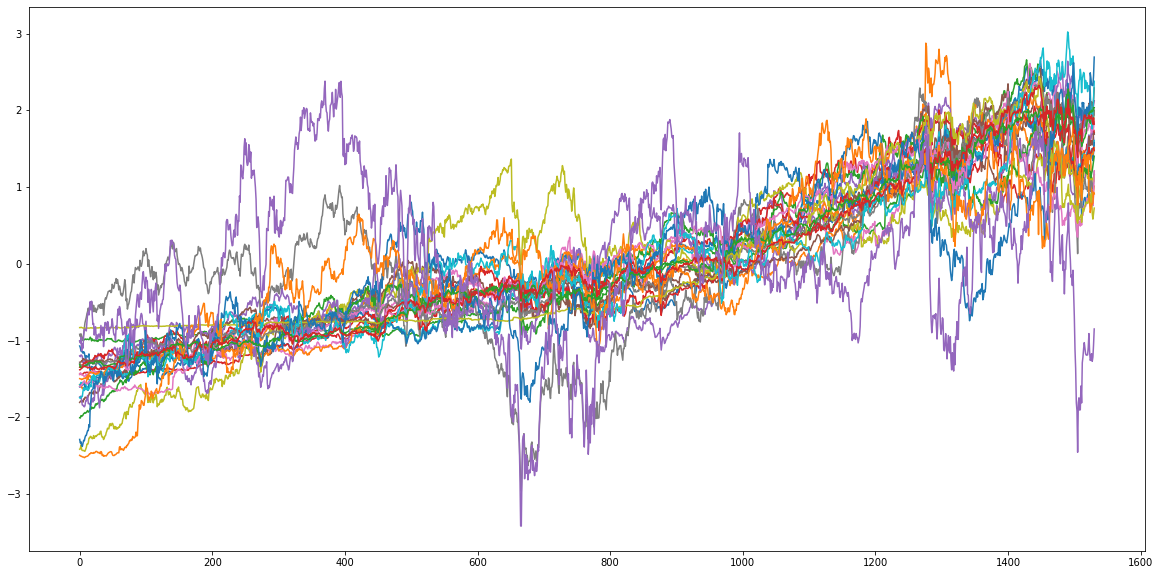

In [25]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(normalized_X_train.to_numpy())
plt.show()

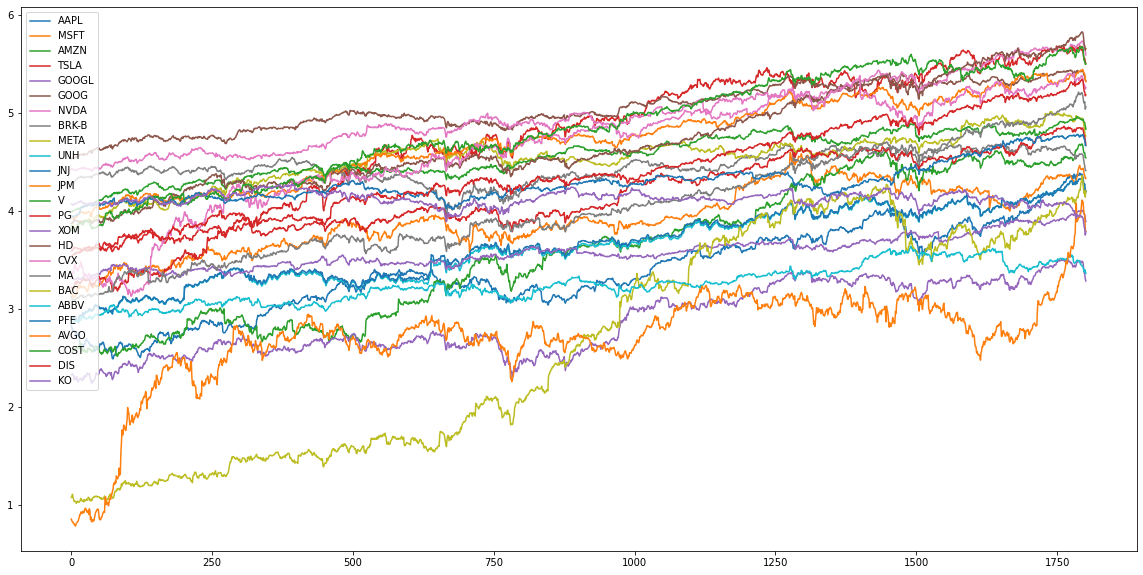

In [26]:
# log distributed data

snp_log = np.log(snp)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(snp_log.to_numpy(), label=snp_tickers)
plt.legend(loc="upper left")
plt.show()

In [27]:
X_train_log, X_test_log = train_test_split(snp_log, test_size=0.15, shuffle=False)

# normalize train and test data based off of std deviation and mean of the train set
normalized_X_train_log = (X_train_log - X_train_log.mean()) / X_train_log.std()
normalized_X_test_log = (X_test_log - X_train_log.mean()) / X_train_log.std()

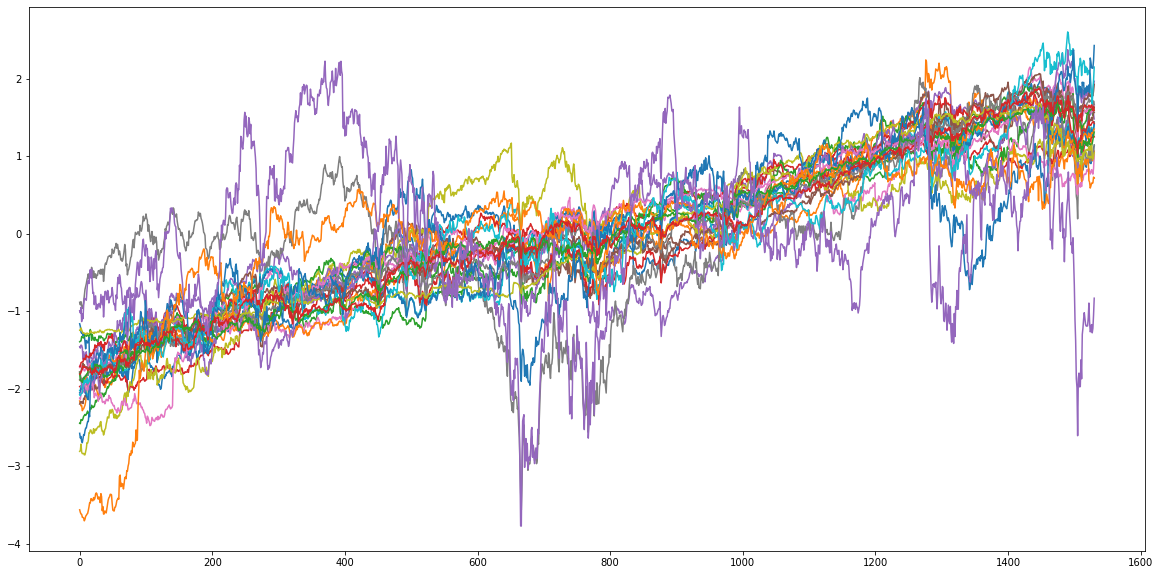

In [28]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(normalized_X_train_log.to_numpy())
plt.show()

In [29]:
normalized_X_train.to_csv('normalized_training_data.csv', index=False)
normalized_X_test.to_csv('normalized_test_data.csv', index=False)
normalized_X_train_log.to_csv('normalized_training_data_log.csv', index=False)
normalized_X_test_log.to_csv('normalized_test_data_log.csv', index=False)